## Plot temperature anomaly time series for Nebraska climate divisions using NCEI data (Figure 2.3)

### Imports

In [10]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

### read data from NCEI

In [17]:
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/5/tavg/12/12/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)

### different baseline (1971-2000)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/5/tavg/12/12/1895-2023.csv?base_prd=true&begbaseyear=1971&endbaseyear=2000", skiprows=4)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/25/tavg/12/12/1895-2024.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/25/tavg/3/5/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/25/tavg/3/8/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/25/tavg/3/11/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/25/tavg/3/9/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/25/tavg/1/2/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/divisional/time-series/2501/tavg/12/12/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/25/tavg/1/5/1895-2024.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)
data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/25/tavg/6/6/1895-2024.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/divisional/time-series/2505/tavg/1/8/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)

## pull out just the year (first four digits)
data['Date'] = data['Date'].astype(str).str[0:4].astype(int)
data = data.set_index("Date")

data

,Value,Anomaly
Date,,
1895,41.4,-1.8
1896,44.7,1.5
1897,42.1,-1.1
1898,43.5,0.3
1899,38.5,-4.7
...,...,...
2020,45.7,2.5
2021,44.3,1.1
2022,44.6,1.4


### calculate Theil-Sen slopes

In [18]:
### calculate some slopes
X = data.reset_index().index  ### index going from 0 to length of vector
res = stats.theilslopes(data.Anomaly, X, 0.90, method='separate')  ## theil-sen
lsq_res = stats.linregress(X, data.Anomaly)  ## least squares
res2= stats.theilslopes(data.Value, X, 0.90, method='separate')  ## theil-sen
lsq_res2 = stats.linregress(X, data.Value)  ## least squares
print(lsq_res)

### and for 1980-2023
data_sub = data.loc[1980:2024]
X_sub = data_sub.reset_index().index
res_sub = stats.theilslopes(data_sub.Anomaly, X_sub, 0.90, method='separate')  ## theil-sen
lsq_res_sub = stats.linregress(X_sub, data_sub.Anomaly)  ## least squares
print(lsq_res_sub)



LinregressResult(slope=0.021008889920659846, intercept=-1.1173810921902525, rvalue=0.3573609210387074, pvalue=2.9946738793902385e-05, stderr=0.004853134174711036, intercept_stderr=0.3621524356854178)
LinregressResult(slope=0.01469038208168643, intercept=1.1034782608695652, rvalue=0.0929155207156445, pvalue=0.5438030079634524, stderr=0.02400644008728502, intercept_stderr=0.6133007273137993)


### plot anomaly time series, with Theil-Sen trends

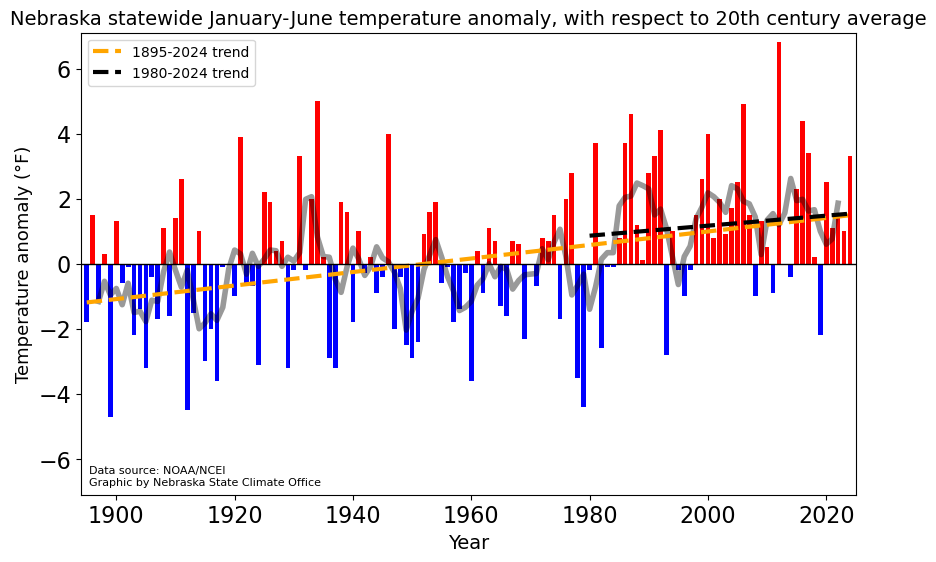

In [19]:
### and add Theil-Sen trend to the plot, following https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.theilslopes.html

fig, ax = plt.subplots(figsize=(10,6))

clrs = ['blue' if (y <= 0) else 'red' for y in data['Anomaly'] ]
#clrs = ['brown' if (y <= 0) else 'blue' for y in data['Anomaly'] ]

p = plt.bar(data.index, data['Anomaly'], linewidth=3, color=clrs)

plt.xlim(1894, 2025)
plt.ylim(-7.1,7.1)
plt.xlabel('Year',fontsize=14)

### plot 10-year running mean
rollmean = data['Anomaly'].rolling(5,center=True).mean()
plt.plot(rollmean,lw=4, alpha=0.4, color='black')

### plot the slopes
ax.plot(data.index, res[1] + res[0] * X, color='orange', lw=3, linestyle='dashed', label='1895-2024 trend')


## and the 1980-2022 slopes
ax.plot(data_sub.index, res_sub[1] + res_sub[0] * X_sub, color='black', lw=3, linestyle='dashed', label='1980-2024 trend')

## Set ticks
#ax.set_xticks([1905, 1915, 1925, 1935, 1945, 1955, 1965, 1975, 1985, 1995, 2005, 2015])


plt.ylabel('Temperature anomaly (°F)',fontsize=13)
plt.title('Nebraska statewide January-June temperature anomaly, with respect to 20th century average',fontsize=14)

plt.axhline(0, linewidth=1, color='black')
plt.tick_params(axis='both',labelsize=13, which='major')
ax.tick_params(axis='both', which='both', labelsize=16)


plt.text(0.01, 0.04, 'Data source: NOAA/NCEI\nGraphic by Nebraska State Climate Office', 
         horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=8)

ax.legend()

plt.show()

fig.savefig('NE_statewide_Tanom_JanJun2024.png',dpi=300,facecolor='white',transparent=False,bbox_inches='tight')

